In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statsmodels.formula.api as smf

In modern society, air pollution is an important topic as this pollution exerts a critically bad influence on human health and the environment. Among air pollutants, Particulate Matter (PM2.5) consists of suspended particles with a diameter equal to or less than 2.5 µm. Sources of PM2.5 can be coal-fired power generation, smoke, or dust. These suspended particles in the air can damage the respiratory and cardiovascular systems of the human body, which may further lead to other diseases such as asthma, lung cancer, or cardiovascular diseases. Beijing is a cosmopolitan city with a population of more than 21.5 million, and Particulate Matter (PM) is one of the main factors that affect human health directly.

I am going to study the Beijing PM2.5 data set, this is an open data resource in UCI ML data repository. I studied the changes of pm2.5 concentration from 2010 to 2014, and observed the changes of pm2.5 concentration through the whole year in different months. In this study, I want to figure out which features affect pm2.5 concentration most, I tried three methods to get the best predictors, which are a correlation matrix, selecting a predictor based on adjusted R squared in simple linear regression, and forward stepwise selection method. Then I analyze the interaction between those predictors. Finally, I compare the mean squared prediction error for different multi-linear models.

# Step1 Gather Data

The dataset is from UCI ML data repository(https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). This hourly data set contains the PM2.5 data of US Embassy in Beijing. 

## 1.1 Import data

In [119]:
file_path = r'E:\Jia\Desktop\MS-DS\5509 Introduction to Machine Learning Supervised Learning\week7\PRSA_data_2010.1.1-2014.12.31.csv'
df = pd.read_csv(file_path)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


This dataset includes 43824 rows and 13 columns. According to df.infor(), I noticed there exists null values in the pm2.5 column.

## 1.2 Inspect null values

In [4]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
df.shape[0]*0.05 > 2067

True

Complete case analysis is to drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations.

## 1.3 Deal with missing data

In [6]:
df = df.dropna()
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


After cleaning missing data, the dataset convert to 41757 rows and 13 columns.

# Step2  Visualizing Data Analysis

## 2.1 Plot the distribution of each feature

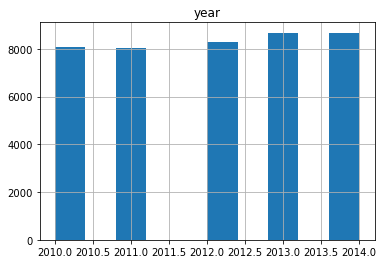

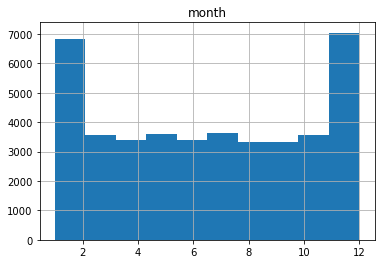

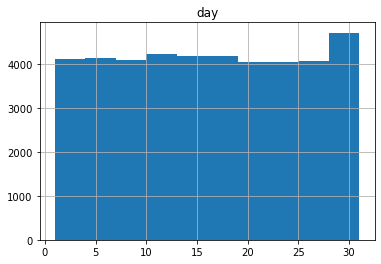

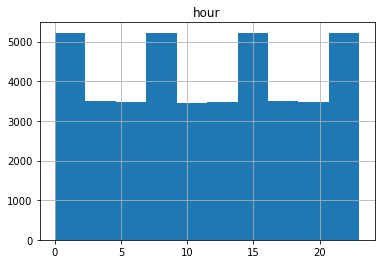

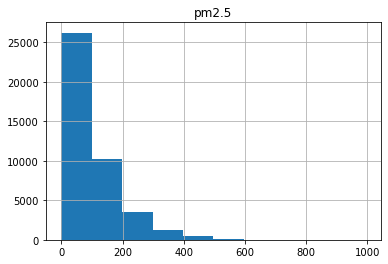

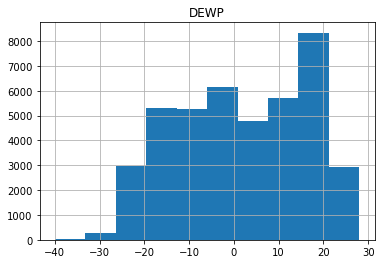

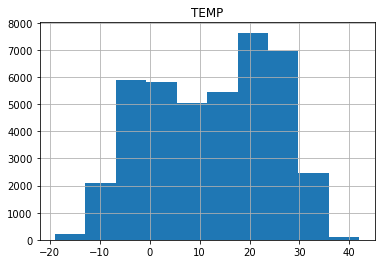

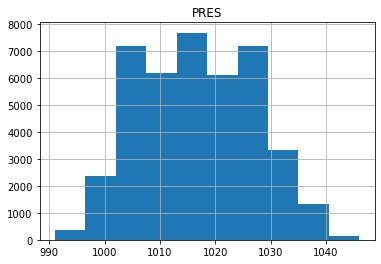

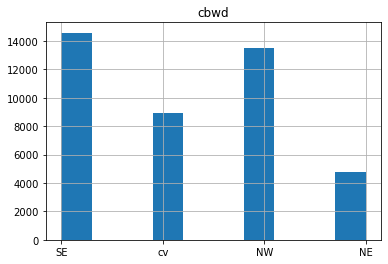

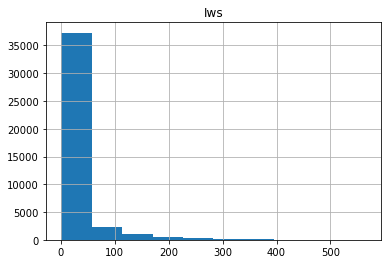

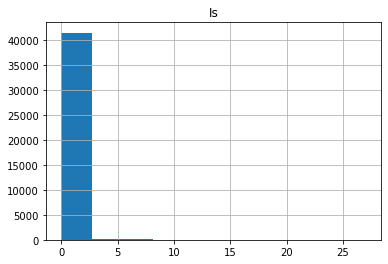

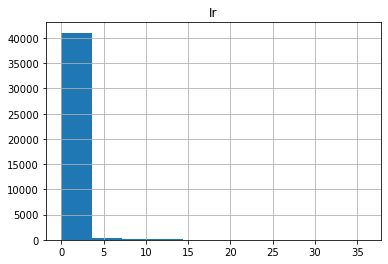

In [7]:
df = df.loc[:, df.columns != 'No']
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()

In [8]:
df = df.rename(columns = {'pm2.5':'pm'})

In [9]:
df

,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## 2.2 PM2.5 in yearly changes

In [10]:
df.groupby('year').sum()

,month,day,hour,pm,DEWP,TEMP,PRES,Iws,Is,Ir
year,,,,,,,,,,
2010,52549,126144,92994,841834.0,10940,91540.0,8222813.5,236377.43,624,2179
2011,53020,128244,92447,795741.0,16330,99660.0,8172252.0,204751.04,453,1199
2012,53521,128334,95443,751078.0,16206,100452.0,8428386.0,204142.61,631,2206
2013,56559,136023,99776,882660.0,11651,107465.0,8815260.5,182742.86,306,1405
2014,56346,136235,99642,846479.0,17955,118735.0,8804894.0,168589.83,297,1148


<AxesSubplot:xlabel='year'>

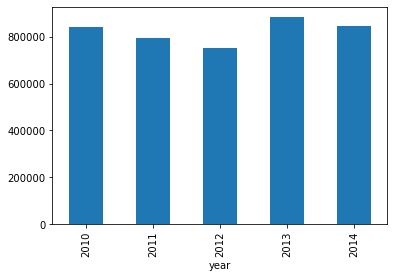

In [11]:
df.groupby('year').sum()['pm'].plot.bar()

I studied the pm2.5 in yearly changes. In 2013, the total observed pm2.5 is the highest, and is the lowest in 2012.

## 2.3 PM2.5 in monthly changes from 2010 to 2014

Text(0.5, 1.0, '2010')

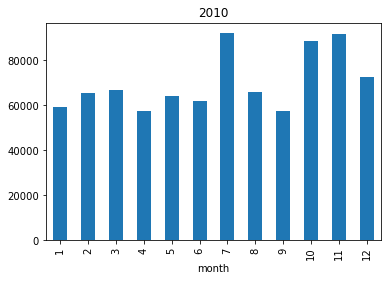

In [12]:
df2010 = df[df['year']==2010]
df2010.groupby('month').sum()['pm'].plot.bar()
plt.title(2010)

Text(0.5, 1.0, '2011')

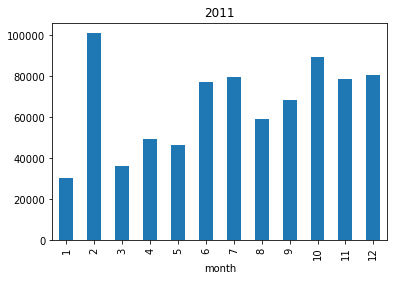

In [13]:
df2011 = df[df['year']==2011]
df2011.groupby('month').sum()['pm'].plot.bar()
plt.title(2011)

Text(0.5, 1.0, '2012')

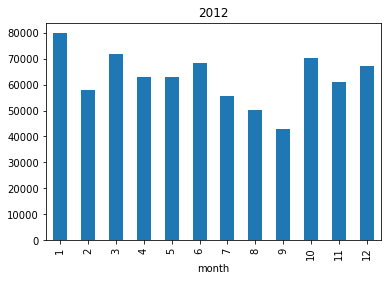

In [14]:
df2012 = df[df['year']==2012]
df2012.groupby('month').sum()['pm'].plot.bar()
plt.title(2012)

Text(0.5, 1.0, '2013')

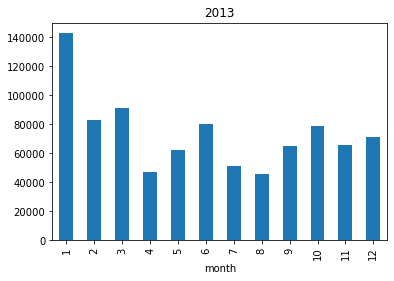

In [15]:
df2013 = df[df['year']==2013]
df2013.groupby('month').sum()['pm'].plot.bar()
plt.title(2013)

Text(0.5, 1.0, '2014')

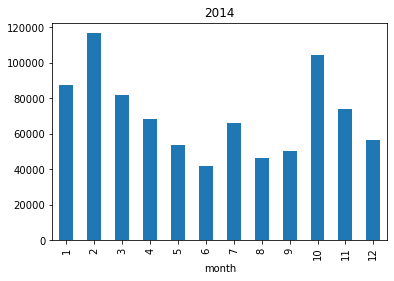

In [16]:
df2014 = df[df['year']==2014]
df2014.groupby('month').sum()['pm'].plot.bar()
plt.title(2014)

I studied the pm2.5 monthly changes from 2010 to 2014. The figure shows that PM2.5 tends to be higher in the winter months (October to February) for each year.  This was expected due to the winter heating.

# 3. Exploratory Data Analysis

## 3.1 Get correlation matrix

In [17]:
corr = df.corr()
corr

,year,month,day,hour,pm,DEWP,TEMP,PRES,Iws,Is,Ir
year,1.000000,-0.002452,-0.000103,0.000200,-0.014690,0.007298,0.055656,-0.013466,-0.068278,-0.019549,-0.026298
month,-0.002452,1.000000,0.006901,-0.000543,-0.024069,0.234492,0.172135,-0.066317,0.014664,-0.062883,0.038874
day,-0.000103,0.006901,1.000000,0.000327,0.082788,0.033537,0.022871,-0.010497,-0.004944,-0.037449,-0.000102
hour,0.000200,-0.000543,0.000327,1.000000,-0.023116,-0.021784,0.149443,-0.041831,0.058865,-0.002455,-0.008741
pm,-0.014690,-0.024069,0.082788,-0.023116,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.007298,0.234492,0.033537,-0.021784,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
TEMP,0.055656,0.172135,0.022871,0.149443,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
PRES,-0.013466,-0.066317,-0.010497,-0.041831,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
Iws,-0.068278,0.014664,-0.004944,0.058865,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
Is,-0.019549,-0.062883,-0.037449,-0.002455,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764


## 3.2 Display the correlation matrix as heat map

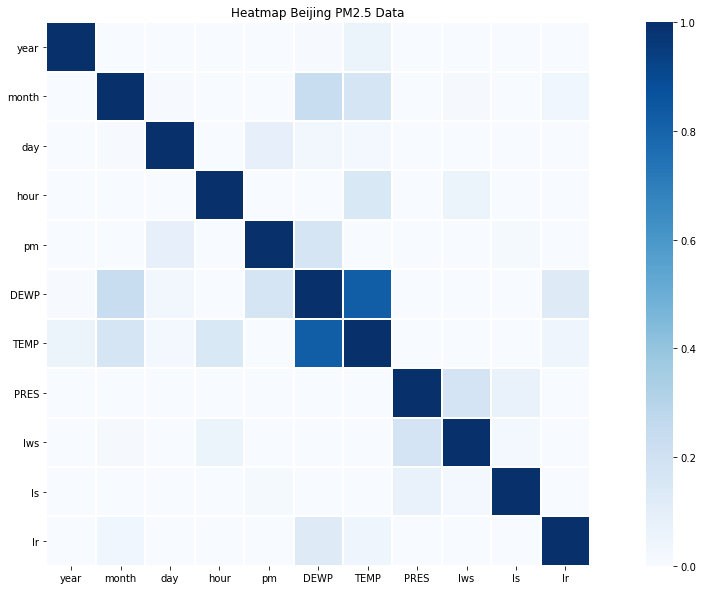

In [18]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, cbar=1, linewidths=1, vmax=1, vmin=0, square=True, cmap='Blues',fmt='.4f',annot_kws={"frontsize":100})
plt.yticks(rotation=0)
plt.title("Heatmap Beijing PM2.5 Data")
plt.show()

I look at the correlation coefficient values in this dataset, some variables have a negative correlation. Then I visualize the correlation coefficient matrix as a heatmap.I have to do forward study to get a more accurate result.

## 3.3 Best predictors based on adjusted R squared in linear regression 

### 3.3.1 Data preparation

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df,test_size=0.2, random_state=123)
print(len(X_train),len(X_test))

33405 8352


Use sklearn.model_selection.train_test_split function to split the data frame to X_train, X_test, y_train, y_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%.

### 3.3.2 Linear regression

In [20]:
res={}
for feature in df.columns:
    model = smf.ols(formula='pm ~ {}'.format(feature), data=X_train).fit()
    r = model.rsquared_adj
    res[feature] = r
print(res)

{'year': 0.00020539812182951422, 'month': 0.0006586277905358262, 'day': 0.006395605319772346, 'hour': 0.0004904419455656894, 'pm': 1.0, 'DEWP': 0.02827449342555255, 'TEMP': 0.008583184608914496, 'PRES': 0.0020008355599913097, 'cbwd': 0.056471204836546995, 'Iws': 0.0600236792348251, 'Is': 0.0002340692468688621, 'Ir': 0.0027023900661933276}


In [21]:
res1 = sorted(res.items(), key=lambda x: x[1],reverse=True)
res1

[('pm', 1.0),
 ('Iws', 0.0600236792348251),
 ('cbwd', 0.056471204836546995),
 ('DEWP', 0.02827449342555255),
 ('TEMP', 0.008583184608914496),
 ('day', 0.006395605319772346),
 ('Ir', 0.0027023900661933276),
 ('PRES', 0.0020008355599913097),
 ('month', 0.0006586277905358262),
 ('hour', 0.0004904419455656894),
 ('Is', 0.0002340692468688621),
 ('year', 0.00020539812182951422)]

In [22]:
top_four_feature = ['Iws', 'cbwd', 'DEWP','TEMP']

Linear regression uses adjusted R squared as fit performance.According to the adjusted R squared values, I get the top four correlated features, which is Iws, cbwd, DEWP, TEMP. 

## 3.4 Forward stepwise refinement

In [23]:
check_factors = ['Iws','cbwd','DEWP', 'TEMP','day', 'Ir', 
                 'PRES','month', 'hour', 'Is', 'year']

In [24]:
best = ['',0]
for p in check_factors:
    model  = smf.ols(formula='pm~'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Iws 0.06005181886842481
cbwd 0.056555942783663826
DEWP 0.028303583519750153
TEMP 0.00861286419265872
day 0.006425350392059492
Ir 0.0027322457005465317
PRES 0.002030712196455231
month 0.0006885446080490132
hour 0.0005203637979802611
Is 0.00026399877419358564
year 0.00023532850746832423
best: ['Iws', 0.06005181886842481]


In [25]:
train1 = smf.ols(formula='pm ~ Iws', data=X_train).fit()
train1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2134.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:11   Log-Likelihood:            -1.9742e+05
No. Observations:               33405   AIC:                         3.948e+05
Df Residuals:                   33403   BIC:                         3.949e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.3148      0.541    201.896      0.000     108.254     110.376
Iws           -0.4535      0.010    -46.196      0.000      -0.473      -0.434
==============================================================================
Omnibus:                    12561.987   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54841.643
Skew:                           1.822   Prob(JB):                         0.00
Kurtosis:                       8.112   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
best = ['',0]
for p in check_factors:
    model  = smf.ols(formula='pm ~ Iws+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Iws 0.06005181886842481
cbwd 0.08816582489233449
DEWP 0.0703019640123802
TEMP 0.07730066762307963
day 0.06614864296375911
Ir 0.06292911314169847
PRES 0.060053813737091066
month 0.06058234899608439
hour 0.0601276491471866
Is 0.06053194049949551
year 0.06105832767587982
best: ['cbwd', 0.08816582489233449]


In [27]:
train2 = smf.ols(formula='pm ~ Iws+cbwd', data=X_train).fit()
train2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     807.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:11   Log-Likelihood:            -1.9691e+05
No. Observations:               33405   AIC:                         3.938e+05
Df Residuals:                   33400   BIC:                         3.939e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.2392      1.435     64.297      0.000      89.427      95.051
cbwd[T.NW]    -4.3818      1.720     -2.548      0.011      -7.753      -1.010
cbwd[T.SE]    25.1271      1.651     15.224      0.000      21.892      28.362
cbwd[T.cv]    34.2332      1.769     19.347      0.000      30.765      37.701
Iws           -0.3554      0.010    -34.027      0.000      -0.376      -0.335
==============================================================================
Omnibus:                    13474.339   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66119.014
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                       8.717   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
best = ['',0]
for p in check_factors:
    model  = smf.ols(formula='pm ~ Iws+cbwd+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Iws 0.08816582489233449
cbwd 0.08816582489233449
DEWP 0.09192847771257084
TEMP 0.11963029591160979
day 0.09374686182500658
Ir 0.09007572024570565
PRES 0.08909547623530467
month 0.0886286987848196
hour 0.08944231510830158
Is 0.08845526462287012
year 0.0896022768375816
best: ['TEMP', 0.11963029591160979]


In [29]:
train3 = smf.ols(formula='pm ~ Iws+cbwd+TEMP', data=X_train).fit()
train3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     907.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:13   Log-Likelihood:            -1.9633e+05
No. Observations:               33405   AIC:                         3.927e+05
Df Residuals:                   33399   BIC:                         3.927e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.1878      1.475     72.692      0.000     104.298     110.078
cbwd[T.NW]    -6.7303      1.691     -3.979      0.000     -10.046      -3.415
cbwd[T.SE]    35.6568      1.650     21.607      0.000      32.422      38.891
cbwd[T.cv]    36.8580      1.740     21.179      0.000      33.447      40.269
Iws           -0.3876      0.010    -37.605      0.000      -0.408      -0.367
TEMP          -1.4253      0.041    -34.550      0.000      -1.506      -1.344
==============================================================================
Omnibus:                    12425.312   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55577.929
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       8.209   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
best = ['',0]
for p in check_factors:
    model  = smf.ols(formula='pm ~ Iws+cbwd+TEMP+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Iws 0.11963029591160979
cbwd 0.11963029591160979
DEWP 0.24050838083691073
TEMP 0.11963029591160979
day 0.12580877314918704
Ir 0.12064311797875782
PRES 0.1567252001763214
month 0.11989868489919275
hour 0.11995830879460745
Is 0.11963758927758728
year 0.12057792142821133
best: ['DEWP', 0.24050838083691073]


In [31]:
train4 = smf.ols(formula='pm ~ Iws+cbwd+TEMP+DEWP', data=X_train).fit()
train4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1763.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:15   Log-Likelihood:            -1.9386e+05
No. Observations:               33405   AIC:                         3.877e+05
Df Residuals:                   33398   BIC:                         3.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.3116      1.461     98.763      0.000     141.448     147.176
cbwd[T.NW]    -1.4156      1.573     -0.900      0.368      -4.498       1.667
cbwd[T.SE]    32.9155      1.533     21.468      0.000      29.910      35.921
cbwd[T.cv]    29.1496      1.620     17.994      0.000      25.974      32.325
Iws           -0.2148      0.010    -21.776      0.000      -0.234      -0.195
TEMP          -5.2602      0.065    -80.831      0.000      -5.388      -5.133
DEWP           4.1367      0.057     72.908      0.000       4.025       4.248
==============================================================================
Omnibus:                    12830.156   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68746.499
Skew:                           1.782   Prob(JB):                         0.00
Kurtosis:                       9.057   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

l use the forward stepwise selection method to create more accurate predictors for pm2.5. Conduct the algorithm for feature = 1, my best solution is Iws.  Conduct the algorithm for features up to 4  , my best solution is Iws+cbwd+TEMP+DEWP. The result is the same as the previous answer which is based on adjusted R squared. 

## 3.5 Multi-linear

### 3.5.1 Construct a multi-linear model without interaction terms

Construct a multi-linear model without interaction terms predicting the pm column on the other three top feature in training dataset.

In [32]:
model1 = smf.ols(formula='pm ~ Iws + cbwd + TEMP + DEWP', data=X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1763.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:15   Log-Likelihood:            -1.9386e+05
No. Observations:               33405   AIC:                         3.877e+05
Df Residuals:                   33398   BIC:                         3.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.3116      1.461     98.763      0.000     141.448     147.176
cbwd[T.NW]    -1.4156      1.573     -0.900      0.368      -4.498       1.667
cbwd[T.SE]    32.9155      1.533     21.468      0.000      29.910      35.921
cbwd[T.cv]    29.1496      1.620     17.994      0.000      25.974      32.325
Iws           -0.2148      0.010    -21.776      0.000      -0.234      -0.195
TEMP          -5.2602      0.065    -80.831      0.000      -5.388      -5.133
DEWP           4.1367      0.057     72.908      0.000       4.025       4.248
==============================================================================
Omnibus:                    12830.156   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68746.499
Skew:                           1.782   Prob(JB):                         0.00
Kurtosis:                       9.057   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.5.2 Construct a multi-linear model with interaction terms

In [116]:
model2 = smf.ols(formula='pm ~ Iws + cbwd + TEMP + DEWP + Iws:cbwd + Iws:TEMP + Iws:DEWP + cbwd:TEMP + cbwd:DEWP + TEMP:DEWP', data=X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     698.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:            -1.9312e+05
No. Observations:               33405   AIC:                         3.863e+05
Df Residuals:                   33386   BIC:                         3.864e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         175.5191      2.456     71.462      0.000     170.705     180.333
cbwd[T.NW]         -8.2981      2.803     -2.960      0.003     -13.793      -2.804
cbwd[T.SE]         11.0342      2.952      3.737      0.000       5.247      16.821
cbwd[T.cv]         24.5442      2.947      8.330      0.000      18.769      30.320
Iws                -1.2441      0.097    -12.830      0.000      -1.434      -1.054
Iws:cbwd[T.NW]      0.6572      0.094      6.956      0.000       0.472       0.842
Iws:cbwd[T.SE]      0.5997      0.103      5.847      0.000       0.399       0.801
Iws:cbwd[T.cv]      0.3617      0.208      1.736      0.083      -0.047       0.770
TEMP               -6.4213      0.200    -32.175      0.000      -6.812      -6.030
cbwd[T.NW]:TEMP    -0.1721      0.230     -0.747      0.455      -0.624       0.280
cbwd[T.SE]:TEMP     1.3186      0.229      5.767      0.000       0.870       1.767
cbwd[T.cv]:TEMP    -0.2511      0.251     -1.000      0.318      -0.744       0.241
DEWP                6.2287      0.172     36.150      0.000       5.891       6.566
cbwd[T.NW]:DEWP    -0.3924      0.194     -2.027      0.043      -0.772      -0.013
cbwd[T.SE]:DEWP    -0.3015      0.194     -1.553      0.120      -0.682       0.079
cbwd[T.cv]:DEWP    -0.0607      0.214     -0.284      0.777      -0.480       0.359
Iws:TEMP            0.0268      0.001     18.155      0.000       0.024       0.030
Iws:DEWP           -0.0224      0.001    -15.676      0.000      -0.025      -0.020
TEMP:DEWP          -0.0941      0.004    -26.567      0.000      -0.101      -0.087
==============================================================================
Omnibus:                    12523.767   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70577.272
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       9.242   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
model3 = smf.ols(formula='pm ~ Iws + cbwd + TEMP + DEWP  + Iws:cbwd + Iws:TEMP + Iws:DEWP  + TEMP:DEWP', data=X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1014.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:17:42   Log-Likelihood:            -1.9326e+05
No. Observations:               33405   AIC:                         3.866e+05
Df Residuals:                   33392   BIC:                         3.867e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.2036      1.670    101.348      0.000     165.931     172.476
cbwd[T.NW]        -9.4619      1.729     -5.473      0.000     -12.851      -6.073
cbwd[T.SE]        30.0964      1.765     17.056      0.000      26.638      33.555
cbwd[T.cv]        21.4810      1.776     12.098      0.000      18.001      24.961
Iws               -1.3235      0.090    -14.632      0.000      -1.501      -1.146
Iws:cbwd[T.NW]     0.7529      0.088      8.508      0.000       0.579       0.926
Iws:cbwd[T.SE]     0.7013      0.097      7.258      0.000       0.512       0.891
Iws:cbwd[T.cv]     0.4336      0.206      2.107      0.035       0.030       0.837
TEMP              -6.0371      0.072    -83.324      0.000      -6.179      -5.895
DEWP               5.6882      0.077     73.579      0.000       5.537       5.840
Iws:TEMP           0.0269      0.001     19.422      0.000       0.024       0.030
Iws:DEWP          -0.0223      0.001    -16.209      0.000      -0.025      -0.020
TEMP:DEWP         -0.0741      0.003    -22.911      0.000      -0.080      -0.068
==============================================================================
Omnibus:                    12584.632   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70713.766
Skew:                           1.724   Prob(JB):                         0.00
Kurtosis:                       9.238   Cond. No.                     7.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I construct a multi-linear model without interaction named model1, then construct a full multi-linear model with interactions named model 3 which are statistically significant at the p=0.05 level. When the p value is larger than threshold, I remove this interaction, so I get the final model3, its adjusted r squared value is larger than model1, and all p values are significant.

# 3.6 Prediction function

Predicting model1(multi-linear model without interaction terms) and model3(multi-linear model with interaction terms) in testing dataset, and calculate the mean squared prediction error to compare to which model is better.

In [35]:
MSPE_model1 = np.mean((y_test['pm']-model1.predict(X_test))**2)
MSPE_model1

6391.396393676956

In [36]:
MSPE_model3 = np.mean((y_test['pm']-model3.predict(X_test))**2)
MSPE_model3

6240.530754787687

I calculate the mean squared prediction error to compare to which model is better. the MSPE of model3 is smaller than model1, it indicates the model 3 is better than model1.

# 4 Results and Analysis

1. I am studying Beijing PM2.5 dataset in UCI machine learning repository, this dataset coverd the pm2.5 data of US embassy in Beijing from 2010 to 2014, the amount PM2.5 concentration is the highest in 2013 which is 882660.

| Year | pm2.5 |
| --- | --- | 
| 2010 | 841834.0 | 
| 2011 | 795741.0 | 
| 2012 | 751078.0 |
| 2013 | 882660.0 |
| 2014 | 846479.0 |

2.Next I studied the pm2.5 monthly changes from 2010 to 2014. The figure shows that PM2.5 tends to be higher in the winter months (October to February) for each year.  This was expected due to the winter heating.

In [109]:
y1 = list(df2010.groupby('month').sum()['pm'])
y2 = list(df2011.groupby('month').sum()['pm'])
y3 = list(df2012.groupby('month').sum()['pm'])
y4 = list(df2013.groupby('month').sum()['pm'])
y5 = list(df2014.groupby('month').sum()['pm'])

|  Year\Month | Jan | Feb | Mar | Apr | May | Jun | Jul | Aug | Spe | Oct | Nov | Dec |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 2010 | 59059.0  | 65244.0 | 66717.0 | 57461.0 | 64045.0 | 61587.0 | 91994.0 | 65979.0 | 68501.0 | 89459.0 | 91712.0 | 72416.0 |


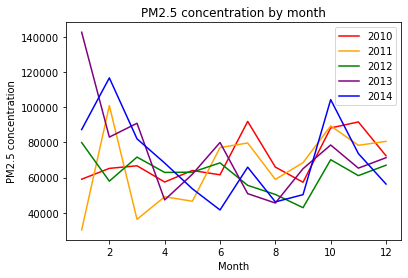

In [114]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x,y1,color='red',label='2010')
plt.plot(x,y2,color='orange',label = '2011')
plt.plot(x,y3,color='green',label = '2012')
plt.plot(x,y4,color='purple',label = '2013')
plt.plot(x,y5,color='blue',label = '2014')
plt.title("PM2.5 concentration by month")
plt.xlabel("Month")
plt.ylabel("PM2.5 concentration")
plt.legend()
plt.show()

3. Three different methods to analyze the best predictors

(1) The correlation coefficient values in this dataset, some variables have a negative correlation. Then I visualize the correlation coefficient matrix as a heatmap.

(2) Get best predictors based on adjusted R squared in simple linear regression. Linear regression uses adjusted R squared as fit performance. I get the top four correlated features, which is Iws, cbwd, DEWP, TEMP.

(3) Forward stepwise selection method to get best solution is Iws+cbwd+TEMP+DEWP. The result is the same as the previous answer which is based on adjusted R squared.  

4. Construct a multi-linear regression model, identify interaction terms in the data. The statistically significant at the p=0.05 level. The final model I get is : model3 = smf.ols(formula='pm ~ Iws + cbwd + TEMP + DEWP  + Iws:cbwd + Iws:TEMP + Iws:DEWP  + TEMP:DEWP', data=X_train).fit(). Its adjusted r squared value is larger than model1,and all p values are significant.

5. Calculate the mean squared prediction error for each model to compare which model is better. the MSPE of model3 is smaller than model1, it indicates the model 3 is better than model1.

# 5 Discussion and Conclusion

In this study, I practiced cleaning the data, used correlation coefficient matrix and heatmap to analyze data, I visualized the pm2.5 concentration yearly changes from 2010 to 2014, and monthly changes in each year,  the figure shows that PM2.5 tends to be higher in the winter months (October to February) for each year. this was expected due to the winter heating.Sources of PM2.5 can be coal-fired power generation, smoke, or dust.

After selecting the best predictors, I get the top four features which are Iws, cbwd, DEWP, TEMP. Then I analyzed the interactions in multi-linear regression to get best model, although the adjusted R squared in the final model  is increased and all p values are significant and its mean squared prediction error is smaller than the previous model, this model is not such good because the adjusted R squared is 0.267 which is not good enough. A possible reason for this situation is because I did not have enough correlated data. In the future, I am going to find more relative pm2.5 pollution data. 

As we know, pm2.5 has an extremely bad influence on daily life, next step  I can study more relative models,  such as building air quality and pollution forecast models based on existing dataset,  people should get to know the air pollution level ahead and make a cautionary statement.


